In [77]:
#importing all the libs i will be using in this project

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean

In [3]:
#importing the dataset

df = pd.read_csv("C:/Users/USER/Desktop/AFRICA DATA SCHOOL/PROJECT/online_retail_data.csv")

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [5]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [8]:
df.describe().head(10)

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [ ]:
#exploring the data and checking whether there are any null values 

In [6]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

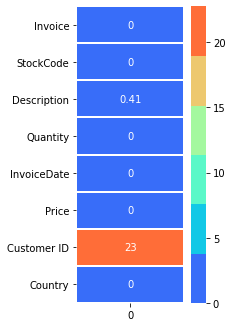

In [9]:
plt.figure(figsize=(15,12))

plt.subplot(231)
sns.heatmap(pd.DataFrame(df.isnull().sum()/df.shape[0]*100),annot=True,
            cmap=sns.color_palette("rainbow"),linewidth=1,linecolor="white")


plt.subplots_adjust(wspace = 1.6)

In [22]:
#dropping all blank records

df.dropna(inplace=True)

In [24]:
#checking if all the null values were dropped

df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [25]:
df["Description"].unique()

array(['15CM CHRISTMAS GLASS BALL 20 LIGHTS', 'PINK CHERRY LIGHTS',
       ' WHITE CHERRY LIGHTS', ..., 'SILVER AND BLACK ORBIT NECKLACE',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [26]:
df["Description"].nunique()

5299

In [27]:
df["Description"].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    5315
REGENCY CAKESTAND 3 TIER              3777
ASSORTED COLOUR BIRD ORNAMENT         2794
JUMBO BAG RED RETROSPOT               2776
LUNCH BAG  BLACK SKULL.               2161
REX CASH+CARRY JUMBO SHOPPER          2150
PARTY BUNTING                         2144
STRAWBERRY CERAMIC TRINKET BOX        2106
POSTAGE                               2019
BAKING SET 9 PIECE RETROSPOT          1976
Name: Description, dtype: int64

In [28]:
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head(10)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,107489
WHITE HANGING HEART T-LIGHT HOLDER,90008
ASSORTED COLOUR BIRD ORNAMENT,79434
JUMBO BAG RED RETROSPOT,74564
BROCADE RING PURSE,70390
PACK OF 60 PINK PAISLEY CAKE CASES,55051
60 TEATIME FAIRY CAKE CASES,53169
PACK OF 72 RETROSPOT CAKE CASES,45742
PACK OF 72 RETRO SPOT CAKE CASES,44507


In [29]:
df["Invoice"].unique()

array(['489434', '489435', '489436', ..., '581585', '581586', '581587'],
      dtype=object)

In [30]:
df["Invoice"].nunique()

44876

In [31]:
df = df[~df["Invoice"].str.contains("C", na=False)]

In [32]:
df["Quantity"].describe().head(10)

count    805620.000000
mean         13.307665
std         144.306739
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [33]:
df["Price"].describe().head(10)

count    805620.000000
mean          3.206279
std          29.197901
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: Price, dtype: float64

In [34]:
#creating a new column that will calculate the total price of an item by multiplying the qty & item price

df["TotalPrice"] = df["Quantity"] * df["Price"]

In [35]:
df["TotalPrice"].describe().head(10)

count    805620.000000
mean         22.024564
std         224.032150
min           0.000000
25%           4.950000
50%          11.850000
75%          19.500000
max      168469.600000
Name: TotalPrice, dtype: float64

In [36]:
df.head()
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
TotalPrice     float64
dtype: object

In [37]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]) # convert from object to datatime

In [38]:
max_date = df["InvoiceDate"].max()
max_date

Timestamp('2011-12-09 12:50:00')

In [39]:
min_date = df["InvoiceDate"].min()
min_date

Timestamp('2009-12-01 07:45:00')

In [40]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,45.0


In [41]:
#introducing a date column
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Date']=df['InvoiceDate'].dt.date
df['Time']=df['InvoiceDate'].dt.time
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Date,Time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,07:45:00


In [42]:
#introducing new month,year,day columns

df['Year']=df['InvoiceDate'].dt.year
df['Month']=df['InvoiceDate'].dt.month
df['Day']=df['InvoiceDate'].dt.day
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Date,Time,Year,Month,Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,07:45:00,2009,12,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00,2009,12,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00,2009,12,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,07:45:00,2009,12,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,07:45:00,2009,12,1


In [43]:
#introducing new month,year,day columns

df['Year']=df['InvoiceDate'].dt.year
df['Month']=df['InvoiceDate'].dt.month
df['Day']=df['InvoiceDate'].dt.day
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Date,Time,Year,Month,Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,07:45:00,2009,12,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00,2009,12,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00,2009,12,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,07:45:00,2009,12,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,07:45:00,2009,12,1


In [44]:
#getting the yearly quarters
df['Quarter']=df['InvoiceDate'].dt.quarter
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Date,Time,Year,Month,Day,Quarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,07:45:00,2009,12,1,4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00,2009,12,1,4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00,2009,12,1,4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,07:45:00,2009,12,1,4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,07:45:00,2009,12,1,4


In [45]:
today_date = dt.datetime(2021, 11, 18)

rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'Invoice': lambda Invoice: Invoice.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})


rfm.columns = ['recency in days', 'frequency in days', 'monetary value']

rfm.head()

,recency in days,frequency in days,monetary value
Customer ID,,,
12346.0,3956,12,77556.46
12347.0,3633,8,5633.32
12348.0,3706,5,2019.40
12349.0,3649,4,4428.69
12350.0,3941,1,334.40


In [46]:
rfm = rfm[rfm["monetary value"] > 0]
rfm.head()

,recency in days,frequency in days,monetary value
Customer ID,,,
12346.0,3956,12,77556.46
12347.0,3633,8,5633.32
12348.0,3706,5,2019.40
12349.0,3649,4,4428.69
12350.0,3941,1,334.40


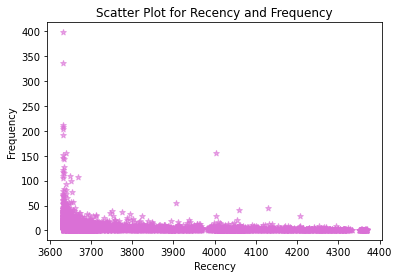

In [47]:
plt.scatter(rfm['recency in days'], rfm['frequency in days'],
            color = 'orchid',
            marker = '*', alpha = 0.6)

plt.title('Scatter Plot for Recency and Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

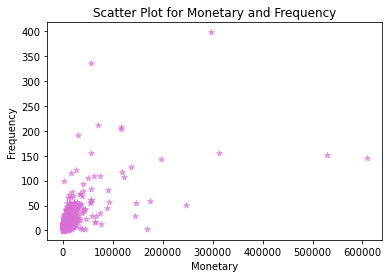

In [48]:
plt.scatter(rfm['monetary value'], rfm['frequency in days'],
            color = 'orchid',
            marker = '*', alpha = 0.6)

plt.title('Scatter Plot for Monetary and Frequency')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.show()

In [49]:
#Recency analyis
rfm["Recency_Score"] = pd.qcut(rfm["recency in days"], 5, labels=[5,4,3,2,1]) 

#Frequency analysis.
rfm["Frequency_Score"] = pd.qcut(rfm["frequency in days"].rank(method = "first"),5 ,labels=[1,2,3,4,5]) 

#Monetary analysis
rfm["Monetary_Score"] = pd.qcut(rfm["monetary value"], 5, labels=[1,2,3,4,5]) 

rfm.head(10)

,recency in days,frequency in days,monetary value,Recency_Score,Frequency_Score,Monetary_Score
Customer ID,,,,,,
12346.0,3956,12,77556.46,2,5,5
12347.0,3633,8,5633.32,5,4,5
12348.0,3706,5,2019.40,3,4,4
12349.0,3649,4,4428.69,5,3,5
12350.0,3941,1,334.40,2,1,2
12351.0,4006,1,300.93,2,1,2
12352.0,3667,10,2849.84,4,5,4
12353.0,3835,2,406.76,2,2,2
12354.0,3863,1,1079.40,2,1,3


In [50]:
rfm["RFM_Score"] =  (rfm["Recency_Score"].astype(str) + rfm["Frequency_Score"].astype(str))

In [51]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}


rfm["Segment"] = rfm["RFM_Score"].replace(seg_map,regex = True)
rfm = rfm[["recency in days", "frequency in days", "monetary value", "RFM_Score","Segment"]]
rfm.head()


,recency in days,frequency in days,monetary value,RFM_Score,Segment
Customer ID,,,,,
12346.0,3956,12,77556.46,25,cant_loose
12347.0,3633,8,5633.32,54,champions
12348.0,3706,5,2019.40,34,loyal_customers
12349.0,3649,4,4428.69,53,potential_loyalists
12350.0,3941,1,334.40,21,hibernating


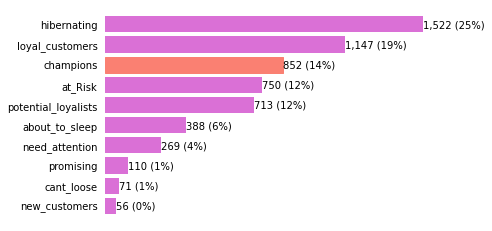

In [52]:
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='orchid')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions']:
            bar.set_color('salmon')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left')
plt.show()

In [53]:
countries=df['Country'].value_counts().reset_index()

In [54]:
countries.columns=['Country','Index']
countries

,Country,Index
0,United Kingdom,725296
1,Germany,16703
2,EIRE,15745
3,France,13813
4,Netherlands,5093
5,Spain,3720
6,Belgium,3069
7,Switzerland,3012
8,Portugal,2446
9,Australia,1815


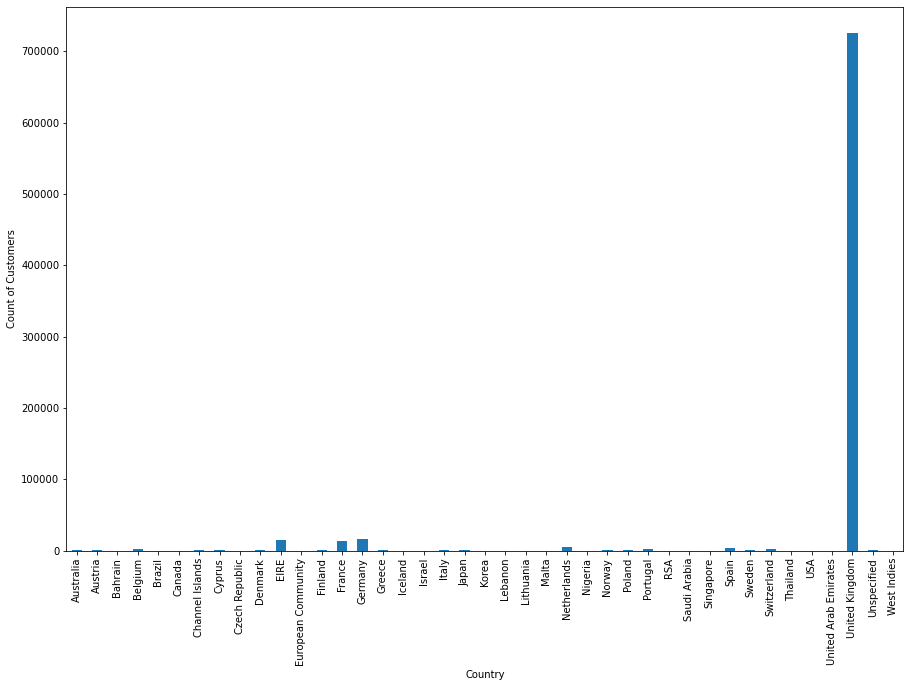

In [55]:
#calculating which country has the highest number of customers using customer id
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
df.groupby('Country')['Customer ID'].count().plot.bar()
plt.ylabel('Count of Customers')
plt.show()

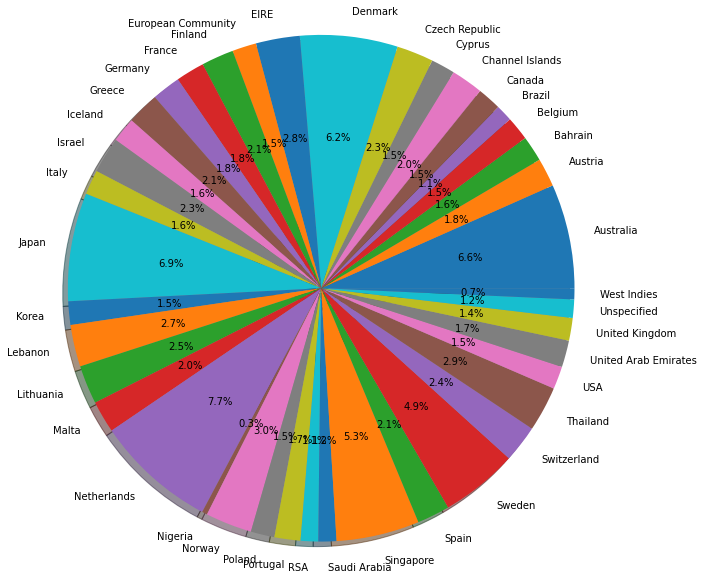

In [56]:
#country with the largest sales
co=df.groupby('Country')['TotalPrice'].mean().reset_index()
coun=list(co['Country'])
coun=list(co['Country'])
size=list(co['TotalPrice'])

labels=co
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(size, labels=coun,shadow=True,autopct='%1.1f%%') 
ax1.axis('equal') 
plt.show()

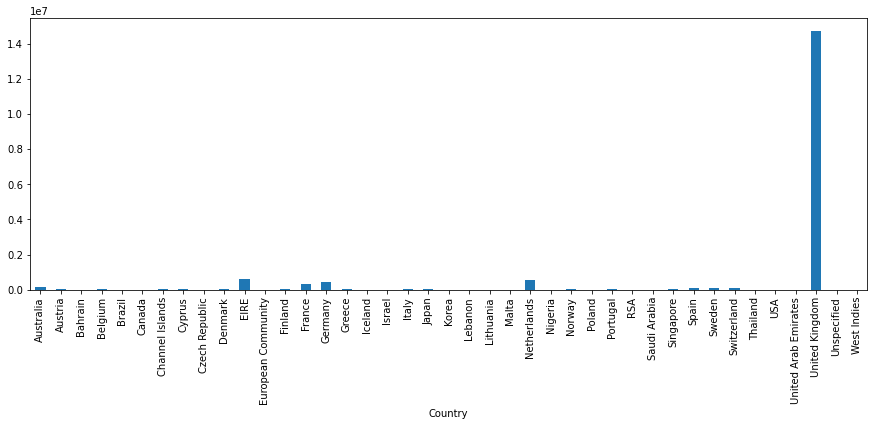

In [57]:
#Which Country has the highest Sales and lowest sales

plt.figure(figsize=(15,5))
df.groupby('Country')['TotalPrice'].sum().plot.bar()
plt.show()

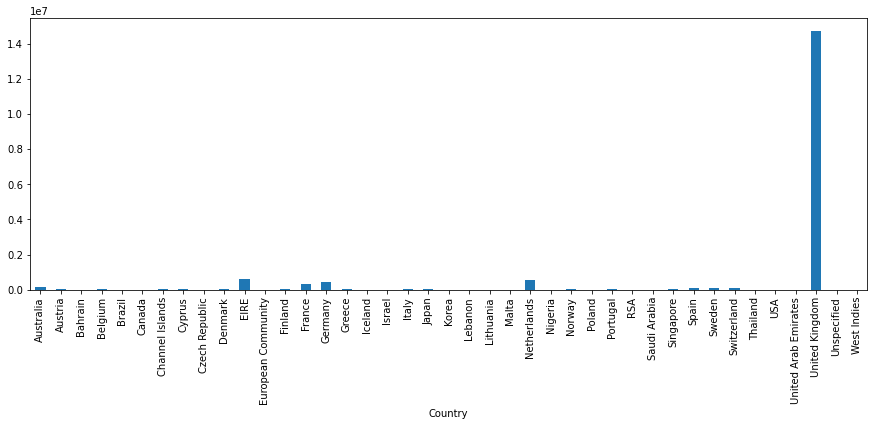

In [58]:
#Which Country has the highest Sales and lowest sales

plt.figure(figsize=(15,5))
df.groupby('Country')['TotalPrice'].sum().plot.bar()
plt.show()

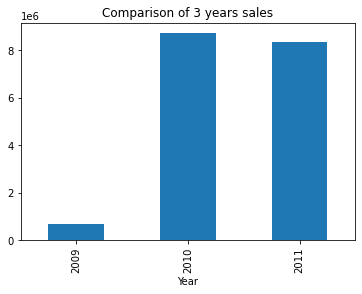

In [59]:
#total money expenditure of 2009 vs 2010 vs 2011

df.groupby('Year')['TotalPrice'].sum().plot.bar()
plt.title('Comparison of 3 years sales')
plt.show()

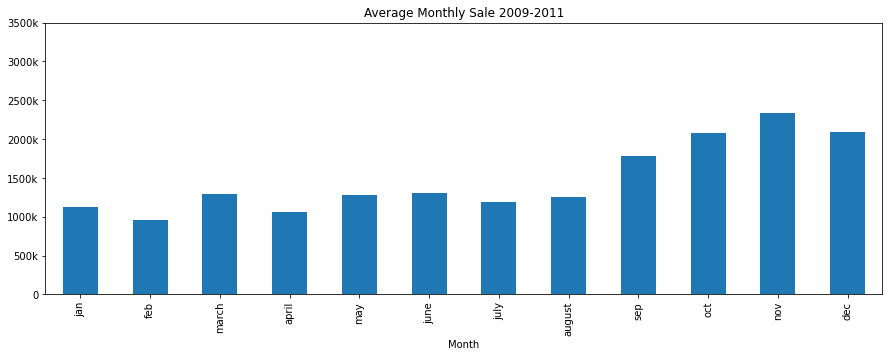

In [60]:
#month with the highest sales
plt.figure(figsize=(15,5))
plt.title('Average Monthly Sale 2009-2011')
df.groupby('Month')['TotalPrice'].sum().plot.bar()
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['jan','feb','march','april','may','june','july','august','sep','oct','nov','dec'])
plt.yticks([0.0,500000.0,1000000.0,1500000.0,2000000.0,2500000.0,3000000.0,3500000.0],['0','500k','1000k','1500k','2000k','2500k','3000k','3500k'])
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


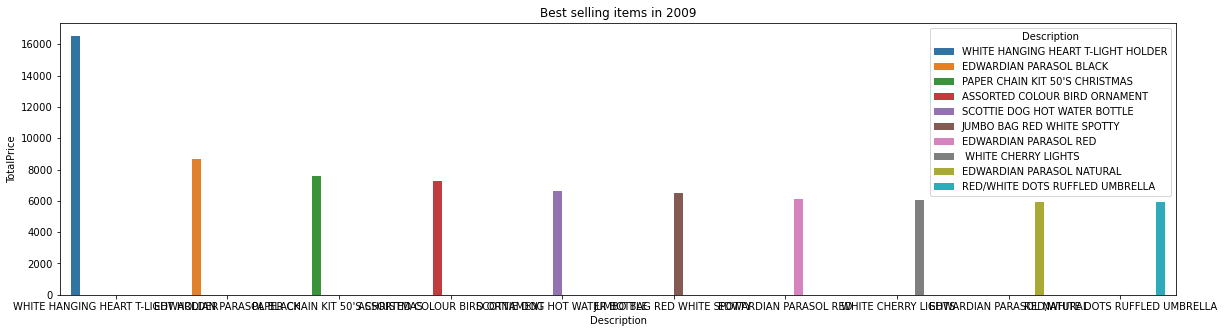

In [61]:
#top10 items by year2009
year09_df=df.groupby(['Year','Description'])['TotalPrice'].sum().sort_values(ascending=False).reset_index()
year09_df=year09_df.loc[year09_df['Year']==2009]
year09_df=year09_df[:10]
year09_df

plt.figure(figsize=(20,5))
plt.title('Best selling items in 2009')
sns.barplot(year09_df['Description'],year09_df['TotalPrice'],hue=year09_df['Description'])
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


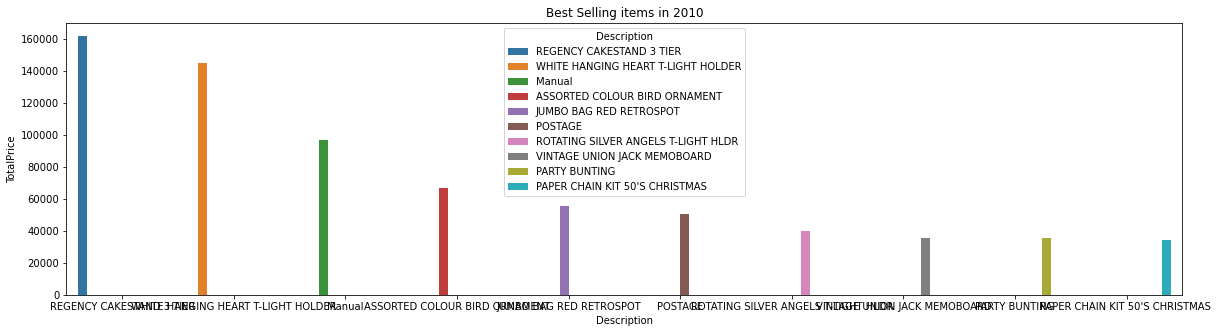

In [62]:
#top10 items by year2010
year2010_df=df.groupby(['Year','Description'])['TotalPrice'].sum().sort_values(ascending=False).reset_index()
year2010_df=year2010_df.loc[year2010_df['Year']==2010]
year2010_df=year2010_df[:10]
year2010_df

plt.figure(figsize=(20,5))
plt.title('Best Selling items in 2010')
sns.barplot(year2010_df['Description'],year2010_df['TotalPrice'],hue=year2010_df['Description'])
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


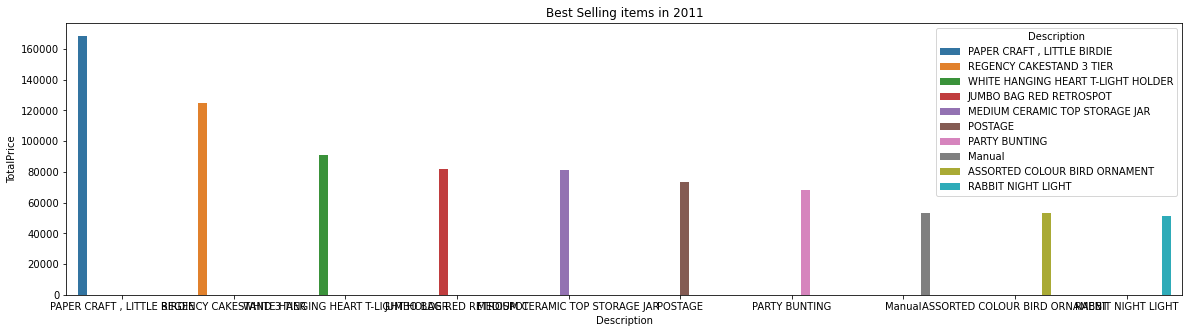

In [63]:
#top10 items by year2011
year2011_df=df.groupby(['Year','Description'])['TotalPrice'].sum().sort_values(ascending=False).reset_index()
year2011_df=year2011_df.loc[year2011_df['Year']==2011]
year2011_df=year2011_df[:10]
year2011_df

plt.figure(figsize=(20,5))
plt.title('Best Selling items in 2011')
sns.barplot(year2011_df['Description'],year2011_df['TotalPrice'],hue=year2011_df['Description'])
plt.show()

In [64]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Date,Time,Year,Month,Day,Quarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,07:45:00,2009,12,1,4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00,2009,12,1,4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00,2009,12,1,4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,07:45:00,2009,12,1,4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,07:45:00,2009,12,1,4


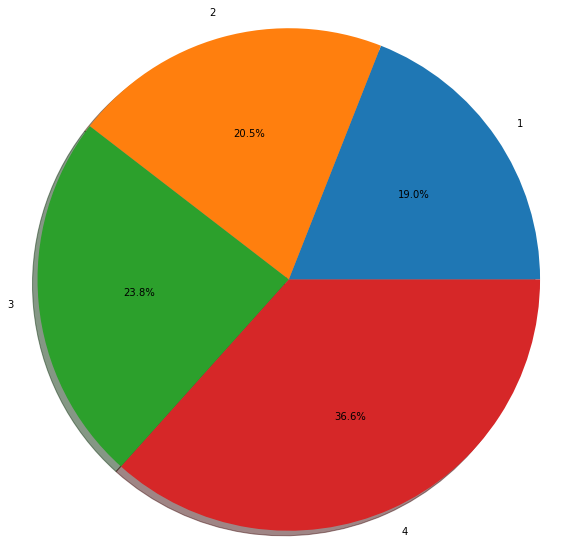

In [65]:
#Quarterly sales
Qt=df.groupby('Quarter')['TotalPrice'].sum().reset_index()
coun=list(Qt['Quarter'])

size=list(Qt['TotalPrice'])

labels=Qt
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(size, labels=coun,shadow=True,autopct='%1.1f%%') 
ax1.axis('equal') 
plt.show()

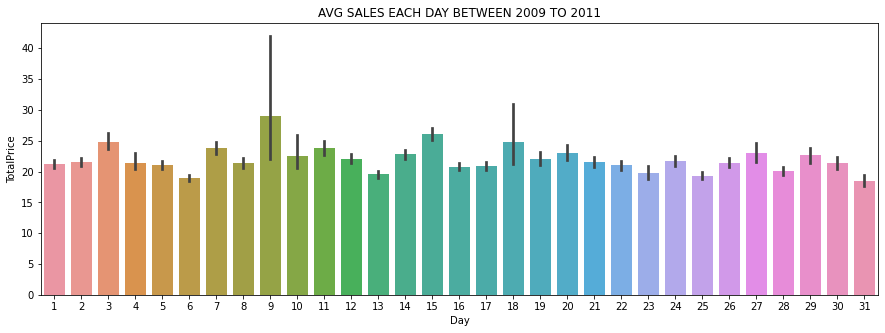

In [78]:
plt.figure(figsize=(15,5))
plt.title('AVG SALES EACH DAY BETWEEN 2009 TO 2011')
sns.barplot(x='Day',y='TotalPrice',data=df,estimator=mean)
plt.show()